Структуры данных позволяют производить 4 основных типа действий: доступ, поиск, вставку и удаление.

### Связанный список
Связанный список — это линейная структура данных. Элементы в таком списке связаны между собой с помощью указателей.  
Каждый узел в списке состоит как минимум из двух частей: данных и указателя (или ссылки) на следующий узел.  
Это структура, которая решает проблему производительности, если нам приходится часто добавлять и удалять данные.  
Данные в связном списке хранятся не подряд, а вразброс.  
  
Вся работа со списком производится через ссылку на его первый элемент, так что переменная head — единственное,  
что нам нужно для реализации алгоритмов.
  
Односвязный список хорош, если нам приходится часто вставлять и удалять элементы в/из начало — O(1).

In [46]:
from copy import deepcopy

class Node:
    def __init__(self, _data=None, _next=None):
        self.data = _data
        self.next = _next

    def __str__(self):
        a = self.next.data if self.next else None
        return f'{self.data}({a})'


class LinkedList:
    def __init__(self, head=None):
        self.head = head
        
    def add_first(self, _data):
        self.head = Node(_data, self.head)

    def insert(self, _data, indx):
        if self.head is None:
            self.head = Node(_data, None)
        elif indx == 0:
            self.add_first(_data) 
        else:
            cur_node = self.head
            while cur_node.next and indx > 1:
                cur_node = cur_node.next
                indx -= 1
            cur_node.next = Node(_data, cur_node.next)

    def reverse(self):
        cur_node = deepcopy(self.head) # !!! deep copy required
        prev = None

        while cur_node:
            nxt = cur_node.next
            cur_node.next = prev
            prev = cur_node
            cur_node = nxt
        
        return LinkedList(prev)


    def __str__(self):
        cur_node = self.head
        s = '['
        while cur_node:
            s += f'{cur_node} '
            cur_node = cur_node.next
        return s + ']'


ll = LinkedList()
for i in range(0, 10):
    ll.insert(i, i)

ll.insert(45, 6)
print(ll)

print(ll.reverse())
print(ll)

[0(1) 1(2) 2(3) 3(4) 4(5) 5(45) 45(6) 6(7) 7(8) 8(9) 9(None) ]
[9(8) 8(7) 7(6) 6(45) 45(5) 5(4) 4(3) 3(2) 2(1) 1(0) 0(None) ]
[0(1) 1(2) 2(3) 3(4) 4(5) 5(45) 45(6) 6(7) 7(8) 8(9) 9(None) ]


### Стек
Стек — это линейная структура данных, которая хранит элементы по принципу «последний вошел/первый вышел» (LIFO).  
В стеке новый элемент добавляется и удаляется только с одного конца.  
Cложность основных функций: O(1)  
Операции .append() и .pop() с постоянным временем делают deque отличным выбором для реализации стека Python.  
Получение данных по индексу myDeque[3] медленнее, чем для list.  
В общем случае, вы должны использовать deque, если вы не используете многопоточность.  
Если вы используете многопоточность, то вам следует использовать LifoQueue.

In [24]:
# deque
from collections import deque
stack = deque()
for i in range(10, 20):
    stack.append(i)
print(stack)
for _ in range(0, 5):
    stack.pop()
print(stack)

deque([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])
deque([10, 11, 12, 13, 14])


In [25]:
# LifoQueue
from queue import LifoQueue
stack = LifoQueue()
for i in range(10, 20):
    stack.put(i)

for _ in range(0, 5):
    print(stack.get())

19
18
17
16
15


In [26]:
# mystack
class Stack:
    def __init__(self):
        self.stack = []
        
    def pop(self):
        self.stack.pop()
            
    def push(self, _data):
        self.stack.append(_data)

    def __str__(self):
        return f'{self.stack}'
    
stk = Stack()
for i in range(10, 20):
    stk.push(i)
print(stk)
for _ in range(0, 5):
    stk.pop()
print(stk)

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[10, 11, 12, 13, 14]


### Очередь (Queue)
Очередь — это структура данных, добавление и удаление элементов в которой происходит путём операций push и pop  
соответственно. Притом первым из очереди удаляется элемент, который был помещен туда первым, то есть в очереди  
реализуется принцип «первым вошел — первым вышел». У очереди имеется голова (head) и хвост (tail).  
Когда элемент ставится в очередь, он занимает место в её хвосте. Из очереди всегда выводится элемент, который  
находится в ее голове. Очередь поддерживает следующие операции:
- empty — проверка очереди на наличие в ней элементов,
- push (запись в очередь) — операция вставки нового элемента,
- pop (снятие с очереди) — операция удаления нового элемента,
- size — операция получения количества элементов в очереди.  
  
Из-за того что нам не нужно снова выделять память, каждая операция выполняется за O(1) времени.

In [27]:
class myQueue:
    def __init__(self):
        self.head = 0
        self.tail = 0
        self.queue = [] 

    def is_empty(self):
        return self.head == 0
    
    def push(self, _data):
        if self.is_empty():
            self.queue.append(_data)
        else:
            self.queue.insert(self.tail, _data)
        self.head += 1

    def pop(self):
        res = None
        if not self.is_empty():
            res = self.queue.pop()
            self.head -= 1
        return res



q = myQueue()
for i in range(10):
    q.push(i)
print(q.queue)
for j in range(4):
    q.pop()
print(q.queue)

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
[9, 8, 7, 6, 5, 4]


In [28]:
# Связная очередь
# от головы до хвоста !
class QNode:
    def __init__(self, _data=None, _next=None):
        self.data = _data
        self.next = _next
    
    def __str__(self):
        return f'{self.data}'

class myLQueue:
    def __init__(self):
        self.length = 0
        self.head = None
        self.tail = None

    def is_empty(self):
        return self.length == 0
    
    def push(self, _data):
        qnode = QNode(_data=_data)
        if self.length == 0:
            self.head = self.tail = qnode
        else:
            self.tail.next = qnode
            self.tail = qnode
        self.length += 1

    def pop(self):
        if self.length > 0:
            self.head = self.head.next
            self.length -= 1
            if self.length:
                self.tail = None

    def __str__(self):
        cur_node = self.head
        s = '['
        while cur_node:
            s += f'{cur_node} '
            cur_node = cur_node.next
        return s.rstrip() + ']'
    


lq = myLQueue()
for i in range(10):
    lq.push(i)
print(lq)
for j in range(4):
    lq.pop()
print(lq)

[0 1 2 3 4 5 6 7 8 9]
[4 5 6 7 8 9]


### Куча (Heap)
Представляет собой очередь с приоритетом.  
Свойство этой структуры данных заключается в том, что она всегда выдает наименьший элемент (min heap).  
При добавлении или удалении элемента структура данных сохраняется.  
heap[0] каждый раз возвращает наименьший элемент.  
Временная сложность:  
- Нахождение минимума за O(1).  
- Удаление минимума за O(n).  
- Добавление нового элемента в кучу за O(n log n).  

В целом, кучи могут быть двух типов: Max-Heap, Min-Heap.  

There are three rules that determine the relationship between the element at the index k and its surrounding elements:
- its first child is at 2*k + 1.
- its second child is at 2*k + 2.
- its parent is at (k - 1) // 2.

In [29]:
import heapq

l = [11, 2, 1, -7, -3, 6, 12]

heapq.heapify(l)
print(l)

# добавление элемента
heapq.heappush(l, 4)
print('add: ', l)

# наименьший элемент
print('get min: ', heapq.heappop(l))
# после получения наименьшего элемента он удаляется из кучи
print(l)

[-7, -3, 1, 2, 11, 6, 12]
add:  [-7, -3, 1, 2, 11, 6, 12, 4]
get min:  -7
[-3, 2, 1, 4, 11, 6, 12]


In [30]:
class BinHeap:
    def __init__(self, binheap=None):
        if binheap:
            self.binheap = binheap.copy()
            self.length = len(binheap)
        else:
            self.binheap = []
            self.length = 0

    def _inc(self, indx):
        while (indx > 0 and self.binheap[indx] < self.binheap[indx // 2]):
            self.binheap[indx], self.binheap[indx // 2] = self.binheap[indx // 2], self.binheap[indx]
            indx //= 2

    def _heapify(self, indx):
        while 2 * indx < self.length:
            l = 2 * indx
            r = 2 * indx + 1
            child_indx = r if r <= self.length and self.binheap[r] < self.binheap[l] else l 
            if self.binheap[indx] <= self.binheap[child_indx]:
                break
            self.binheap[indx], self.binheap[child_indx] = self.binheap[child_indx], self.binheap[indx]
            indx = child_indx

    def _build(self):
        for indx in range(self.length // 2, -1, -1):
            self._heapify(indx)

    def _add(self, _data):
        self.binheap.append(_data)
        indx = self.length
        self.length += 1
        self._inc(indx)

    def _get(self):
        result = self.binheap.pop(0)
        self.length -= 1
        return result


    def __str__(self):
        return f'{self.binheap}'

import random

ll = [random.randint(-10, 10) for _ in range(10)]
bh = BinHeap(ll)
bh._build()
print(bh)

bh._add(-12)
print(bh)

mn = bh._get()
print(mn)
print(bh)


[-9, -9, -9, -6, 2, -6, -1, 6, 6, 9]
[-12, -9, -9, -6, 2, -9, -1, 6, 6, 9, -6]
-12
[-9, -9, -6, 2, -9, -1, 6, 6, 9, -6]


### Бинарное дерево  
Иерархическая структура данных, в которой каждый узел имеет не более двух потомков (детей).  
Как правило, первый называется родительским узлом, а дети называются левым и правым наследниками.  
Узлы могут не иметь дочерних узлов - называются листьями.  
Двоичное дерево является упорядоченным ориентированным деревом (не содержащее циклов).  
Для практических целей обычно используют два подвида двоичных деревьев — двоичное дерево поиска и двоичная куча.


#### Бинарное дерево поиска (BST)
Бинарные деревья поиска отличаются от обычных бинарных деревьев тем, что хранят данные в отсортированном виде.  
Хранение значений внутри бинарного дерева поиска организовано в следующем виде:
 - Все значения в узлах левого дочернего поддерева меньше значения родительского узла
 - Все значения в узлах правого дочернего поддерева больше значения родительского узла
 - Каждый дочерний узел тоже является бинарным деревом поиска  

 Временная сложность:
 - поиск в срднем O(log n), в худшем O(n)
 - вставка в срднем O(log n), в худшем O(n)
 - удаление в срднем O(log n), в худшем O(n)
 - обход O(n)

 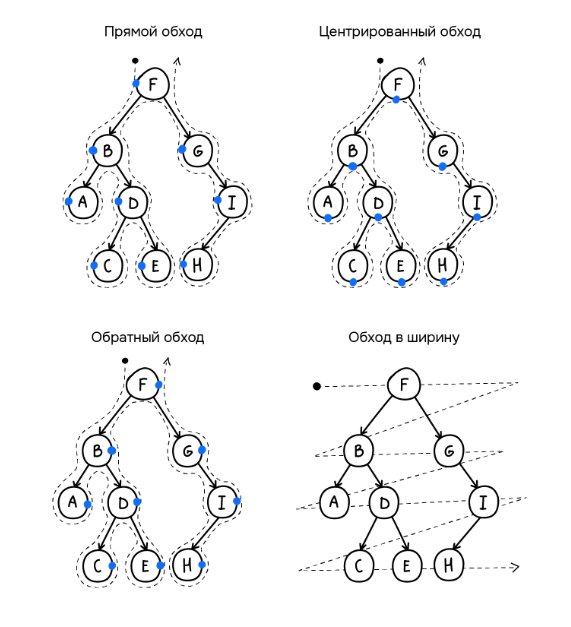

In [31]:
class BinTreeNode:
    def __init__(self, _data):
        self.left = None
        self.right = None
        self.parent = None
        self.data = _data


class BinTreeSearch:
    def __init__(self):
        self.root = None

    # вставка
    def _insert(self, _data):
        new_node = BinTreeNode(_data)
        if not self.root:
            self.root = new_node
            return
        
        current = self.root
        while current:
            if new_node.data >= current.data:
                if current.right:
                    current = current.right
                    continue
                current.right = new_node
                current.right.parent = current
                break
            else:
                if current.left:
                    current = current.left
                    continue
                current.left = new_node
                current.left.parent = current
                break

    # поиск
    def _search(self, _data, current=False):
        if current == False:
            return self._search(_data, self.root)
        elif current == None: 
                return None
        elif current.data == _data:
                parent_data = current.parent.data if current.parent else None
                left_data = current.left.data if current.left else None
                right_data = current.right.data if current.right else None
                return parent_data, current.data, left_data, right_data
        elif current.data < _data:
            return self._search(_data, current.right)
        else:
            return self._search(_data, current.left)

    # минимум
    def _get_min(self, current=False):
        if current == False:
            return self._get_min(self.root)
        elif current == None: 
                return None
        elif current.left == None:
            parent_data = current.parent.data if current.parent else None
            left_data = current.left.data if current.left else None
            right_data = current.right.data if current.right else None
            return parent_data, current.data, left_data, right_data
        else:
            return self._get_min(current.left)

    # максимум
    def _get_max(self, current=False):
        if current == False:
            return self._get_max(self.root)
        elif current == None: 
                return None
        elif current.right == None:
            parent_data = current.parent.data if current.parent else None
            left_data = current.left.data if current.left else None
            right_data = current.right.data if current.right else None
            return f'{parent_data} [{current.data}] ({left_data} {right_data})'
        else:
            return self._get_max(current.right)

    # прямой обход
    def pre_order(self, current=False):
        if current == False:
            self.pre_order(self.root)
        elif current != None:
            parent_data = current.parent.data if current.parent else None
            print(f'{current.data} ({parent_data})')
            self.pre_order(current.left)
            self.pre_order(current.right)
    
    # обратный обход
    def post_order(self, current=False):
        if current == False:
            self.post_order(self.root)
        elif current != None:
            self.post_order(current.left)
            self.post_order(current.right)
            parent_data = current.parent.data if current.parent else None
            print(f'{current.data} ({parent_data})')

    # центрированный обход
    def center_order(self, current=False):
        if current == False:
            self.center_order(self.root)
        elif current != None:
            self.center_order(current.left)
            parent_data = current.parent.data if current.parent else None
            print(f'{current.data} ({parent_data})')
            self.center_order(current.right)

    # обход в ширину
    def level_order(self, current=False):
        if current == False:
            self.level_order(self.root)
        
        queue_nodes = []
        if current:
            queue_nodes.append(current)
        
        while len(queue_nodes) > 0:
            current = queue_nodes.pop(0)
            
            parent_data = current.parent.data if current.parent else None
            print(f'{current.data} ({parent_data})')

            if current.left: queue_nodes.append(current.left)
            if current.right: queue_nodes.append(current.right)


    '''
        При рекурсивном удалении узла из бинарного дерева нужно рассмотреть три случая: 
        удаляемый элемент находится в левом поддереве текущего поддерева, 
        удаляемый элемент находится в правом поддереве или 
        удаляемый элемент находится в корне. 
        В двух первых случаях нужно рекурсивно удалить элемент из нужного поддерева. 
        Если удаляемый элемент находится в корне текущего поддерева и имеет два дочерних узла, 
        то нужно заменить его минимальным элементом из правого поддерева 
        и рекурсивно удалить этот минимальный элемент из правого поддерева. 
        Иначе, если удаляемый элемент имеет один дочерний узел, нужно заменить его потомком.
        Рекурсивная функция, возвращающая дерево с удаленным элементом.
    '''
    def _delete(self, _data, current=False):
        if current == False:
            return self._delete(_data, self.root)
        elif current == None:
            return None
        elif current.data > _data:
            current.left = self._delete(_data, current.left)
        elif current.data < _data:
            current.right = self._delete(_data, current.right)
        elif current.left and current.right:
            current.data = self._get_min(current.right)[1]
            current.right = self._delete(current.data, current.right)
        else:
            if current.left:
                current = current.left
            elif current.right:
                current = current.right
            else:
                current = None
        return current


bt = BinTreeSearch()
ll = [random.randint(-15, 15) for _ in range(10)]
print(ll)
for x in ll:
    bt._insert(x)
# current = bt._delete(10)
# bt.level_order(current)
bt.level_order()

[6, -14, -6, -4, 7, 14, -10, 5, -13, 5]
6 (None)
-14 (6)
7 (6)
-6 (-14)
14 (7)
-10 (-6)
-4 (-6)
-13 (-10)
5 (-4)
5 (5)
